### Student Information
Name: Lee Huai

Student ID: 111065524

GitHub ID: chihuahualee828

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [115]:
### Begin Assignment Here

### ** >>> Section 1, take home exercise** 
Run below before start running exercise

In [116]:
import pandas as pd
# my functions
import sys
sys.path.append('../helpers')
import data_mining_helpers as dmh
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nick0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [117]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [118]:
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

##### Answer here
some variants for

```python 
X.iloc[:10, 0]
X.loc[:10, 'text']
```

In [119]:
print(X["text"][:10])
print(X.text[:10])
print(X["text"].iloc[:10])

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object
0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquel

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

##### Answer here:
`.isnull()` did not detect the null on some rows (3,4,6 here) because they are not actually nan but str datatype and cannot be discerned as null.

In [120]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [121]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
print(X_sample.shape)
display(X_sample)

(2257, 3)
(1000, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


In [122]:
print(X.groupby("category_name").size()/X.shape[0])
print(X_sample.groupby("category_name").size()/X_sample.shape[0])

category_name
alt.atheism               0.212672
comp.graphics             0.258751
sci.med                   0.263181
soc.religion.christian    0.265397
dtype: float64
category_name
alt.atheism               0.206
comp.graphics             0.247
sci.med                   0.277
soc.religion.christian    0.270
dtype: float64


##### Answer here
1. by printing the shape of X and X_sample, we can see the shape changed from (2257, 3) to (1000, 3).

2. the index order of the records is not longer maintained since we randomly sampled 1000 from the original.

3. we can see the distribution of each category has changed since sampling is random, but is still somewhat close due to the representative nature of sampling.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: title={'center': 'Category Distribution'}, xlabel='category_name'>

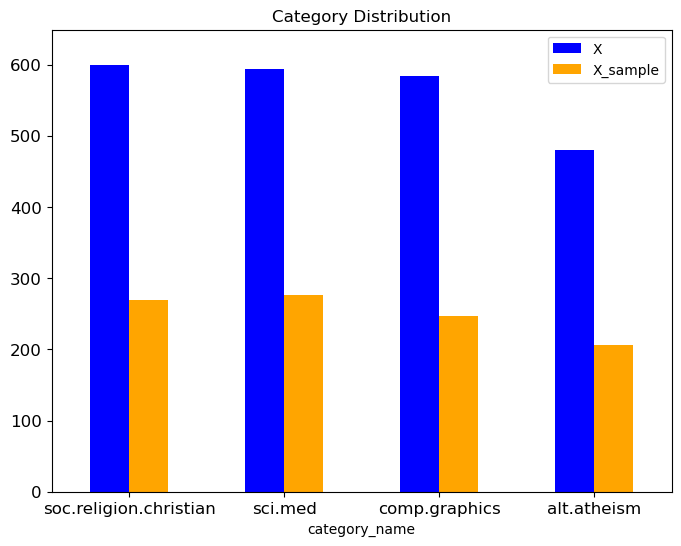

In [123]:
# Answer here

combined = pd.concat([X["category_name"].value_counts(), X_sample["category_name"].value_counts()], axis=1)

combined.columns = ["X", "X_sample"]

upper_bound = max(combined.X + 50)
# Plot the data with blue and orange bars side by side
combined.plot(kind='bar', rot=0, title="Category Distribution", color=['blue', 'orange'], ylim = [0, upper_bound], 
                   fontsize=12, figsize=(8, 6))


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0]) # doc index

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [125]:
X_counts[4, :100].toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [126]:
count_vect.get_feature_names_out()[37]

'01'

In [127]:
# Answer here
# X_counts[4,:100].toarray()==1)[0] get the true/false array of the 5th record, [1] will then find the second true in the array,
count_vect.get_feature_names_out()[:100][(X_counts[4,:100].toarray()==1)[0]][1]

'01'

So this other 1 in the same record(5th) in the first 100 features, that is the second one(there are only two features with count 1 in the first 100 features), and that feature is the 38th feature in the entire feature space, however, instead of just using 
```python 
count_vect.get_feature_names_out()[37] 
```
we can use the code one block above to access that feature name.

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [128]:
import seaborn as sns

[134  92   1 ...   1   1   1]
[32142 23610 32493  4992 18474 17556 32139 18551 35638 14601 23250 32270
  6298 14887  5410 12626 16254  5549 23733 35157]


,term_the,term_of,term_to,term_and,term_is,term_in,term_that,term_it,term_you,term_for,term_not,term_this,term_be,term_from,term_are,term_edu,term_have,term_as,term_on,term_with
doc_561,2,2,2,2,2,1,0,1,0,0,1,0,2,1,0,2,0,0,0,0
doc_440,10,5,2,0,3,5,2,0,0,0,1,0,1,1,0,1,0,1,1,0
doc_1513,26,20,23,5,17,15,11,8,7,7,2,3,4,2,5,1,6,7,4,1
doc_1360,6,7,10,2,4,5,5,4,2,0,1,4,0,1,0,0,2,1,0,1
doc_259,2,1,2,3,1,0,3,3,1,0,0,2,1,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_1316,6,5,6,5,2,3,4,2,1,1,1,2,0,3,2,3,5,0,0,0
doc_592,10,4,5,2,5,7,2,1,1,1,3,3,2,1,0,2,3,1,2,0
doc_1965,6,5,8,3,2,2,1,1,10,2,3,3,3,1,4,0,1,2,2,3
doc_363,0,1,3,1,2,2,0,1,0,0,0,0,0,1,2,0,1,0,2,0


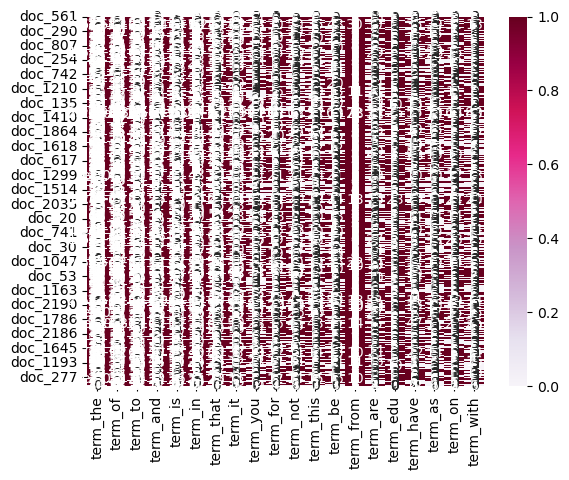

In [129]:
# Answer here
# get top k frequent terms within all articles
feature_frequencies = np.array(X_counts.toarray().sum(axis=0))
print(feature_frequencies)
top_k_indices = feature_frequencies.argsort()[::-1][:20]
print(top_k_indices)

top_k_features = [count_vect.get_feature_names_out()[i] for i in top_k_indices]

X_sample = X.sample(n=1000, random_state=42)
X_counts_sample = X_counts[X_sample.index]
# top_k_freq = np.sort(feature_frequencies)[::-1][:20]
# for i, feature, freq in zip(top_k_indices,top_k_features,top_k_freq):
#     print(i, feature, freq)
plot_x = ["term_"+str(i) for i in top_k_features]
plot_y = ["doc_"+ str(i) for i in list(X_sample.index)]
plot_z = X_counts_sample.toarray()[:,top_k_indices]


# plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:]]
# plot_y = ["doc_"+ str(i) for i in list(X.index)[:]]
# plot_z = X_counts[:, :].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
# plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [130]:
from sklearn.decomposition import PCA

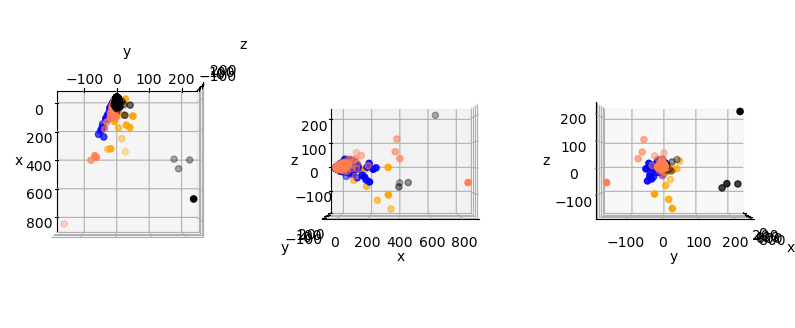

In [131]:
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

# plot
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    ax2.scatter(xs, ys, zs, c = c, marker='o')
    ax3.scatter(xs, ys, zs, c = c, marker='o')

for each in axs:
    each.set_axis_off()

for each in (ax1,ax2,ax3):
    each.set_xlabel('x')
    each.set_ylabel('y')
    each.set_zlabel('z')

ax1.view_init(elev=90, azim=0) # view along z axis 
ax2.view_init(elev=0, azim=-90) # view along y axis
ax3.view_init(elev=0, azim=0) # view along x axis  

plt.show()

We plot the result using 3D plot, with views from different angles, here we view along z,y,x axis (view on xy, xz, yz planes).

We observed that

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [132]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [133]:
import plotly.express as px
import plotly.graph_objects as go

In [134]:
# Answer here
# get top 300 most frequent term's indices
top_300_indices = term_frequencies.argsort()[::-1][:300]
# sort them back in the original order(optional, this is just to show the plot x-lable in the original order(that is alphabetical))
top_300_indices = top_300_indices[np.argsort(top_300_indices)]
print(top_300_indices)

top_300_features = [count_vect.get_feature_names_out()[i] for i in top_300_indices]
print(top_300_features)

x = top_300_features
y = term_frequencies[top_300_indices]

# fig = px.bar(x=x, y=y)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


# Create a layout for the chart
fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  # Set tickmode to 'array' to use an array of tickvals
    tickvals=list(range(len(x))),  # Set tickvals to the range of x-values
    ticktext=x,  # Set ticktext to the x-labels
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)
fig.update_layout(hovermode="x")
fig.show(config={"scrollZoom": True, "displayModeBar": True})

[  242   677   755  1102  1341  1586  3958  4017  4215  4471  4486  4720
  4808  4852  4938  4992  5110  5195  5201  5203  5340  5410  5430  5529
  5549  5698  5714  5718  5906  6024  6140  6212  6298  6333  6358  6371
  6412  6430  6540  6557  6561  6597  6744  7005  7062  7480  7505  7643
  7718  7766  7800  7965  8071  8544  8553  8557  8559  8609  8713  9072
  9093  9338  9992 10037 10324 10699 10736 10752 11493 11520 11904 12014
 12051 12052 12096 12472 12626 12711 13091 13400 13491 13511 13521 13567
 13672 13908 13952 14021 14212 14277 14281 14309 14357 14601 14733 14819
 14887 15319 15405 15511 15521 15545 15576 15591 15699 15837 16014 16216
 16254 16302 16328 16409 16418 16470 16482 16603 16642 16881 16908 16913
 16999 17268 17356 17556 17854 18268 18474 18551 18585 18774 18880 18957
 19076 19218 19458 19787 19841 19924 20048 20167 20198 20253 20342 20373
 20463 20470 20517 20770 20825 20862 20903 20978 21033 21209 21322 21332
 21386 21732 22215 22270 22379 22403 22509 22541 22

You can scroll to zoom in/out on the image, pan over to right to see features at the back, and hover over the bar to better see the term and frequency.

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [135]:
# get top 100 this time
top_100_indices = term_frequencies.argsort()[::-1][:100]
top_100_indices = top_100_indices[np.argsort(top_100_indices)]
print(top_100_indices)

top_100_features = [count_vect.get_feature_names_out()[i] for i in top_100_indices]
print(top_100_features)

x = top_100_features
y = term_frequencies[top_100_indices]
# fig = px.bar(x=x, y=y)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))

# Create a layout for the chart
fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  # Set tickmode to 'array' to use an array of tickvals
    tickvals=list(range(len(x))),  # Set tickvals to the range of x-values
    ticktext=x,  # Set ticktext to the x-labels
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)


fig.show(config={"scrollZoom": True, "displayModeBar": True})

[ 3958  4720  4808  4852  4938  4992  5195  5410  5529  5549  5698  6298
  6333  6358  6430  7480  7505  7766  9072 12014 12051 12096 12626 14601
 14887 15319 15521 15576 16014 16216 16254 16302 16642 16908 17268 17556
 18474 18551 18774 19076 19458 20198 20253 20978 21209 21322 22215 22541
 23123 23250 23610 23733 23741 23757 23870 23915 24020 24052 24784 25663
 27031 28755 29121 29578 30068 30173 31077 31180 32131 32139 32142 32152
 32160 32164 32202 32221 32233 32253 32270 32417 32493 33597 33773 33847
 33858 34229 34703 34775 34879 34923 34935 34954 34982 35006 35057 35157
 35312 35350 35638 35648]
['about', 'all', 'also', 'am', 'an', 'and', 'any', 'are', 'article', 'as', 'at', 'be', 'because', 'been', 'believe', 'but', 'by', 'can', 'com', 'do', 'does', 'don', 'edu', 'for', 'from', 'get', 'god', 'good', 'had', 'has', 'have', 'he', 'his', 'how', 'if', 'in', 'is', 'it', 'jesus', 'just', 'know', 'like', 'lines', 'many', 'may', 'me', 'more', 'my', 'no', 'not', 'of', 'on', 'one', 'only'

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [136]:
# Answer here

# sort by frequency
sorted_indices = term_frequencies.argsort()[::-1][:]

# get top 300
x = [count_vect.get_feature_names_out()[i] for i in sorted_indices[:300]]
y = term_frequencies[sorted_indices[:300]]

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  
    tickvals=list(range(len(x))),  
    ticktext=x,
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)


fig.show(config={"scrollZoom": True, "displayModeBar": True})

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [138]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [139]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['category_name'])
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


Answer:
Yes, it does, we just have to reintialize a LabelBinarizer and fit it with `category_name` column, see below:

# >>> **Part2:**

## 1. Data Preparation
combine three labeled datasets into one file:

In [141]:
data_amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
data_imdb = pd.read_csv('imdb_labelled.txt', sep='\t', header=None)
data_yelp = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)

print(data_amazon.shape)
print(data_imdb.shape)
print(data_yelp.shape)

# combined all datas and assign column name
data_combined = pd.concat([data_amazon, data_imdb, data_yelp], ignore_index=True)
data_combined.columns=['sentence', 'score']
data_combined

(1000, 2)
(748, 2)
(1000, 2)


,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


## 2. Dealing with missing values and duplicates

In [142]:
# check if missing value exists
data_combined.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [143]:
# create label based on score, positive: 1 and negative: 0
label_name = ['negative', 'positive']
data_combined['label_name'] = data_combined.score.apply(lambda t: label_name[t])
data_combined

,sentence,score,label_name
0,So there is no way for me to plug it in here i...,0,negative
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
3,Tied to charger for conversations lasting more...,0,negative
4,The mic is great.,1,positive
...,...,...,...
2743,I think food should have flavor and texture an...,0,negative
2744,Appetite instantly gone.,0,negative
2745,Overall I was not impressed and would not go b...,0,negative
2746,"The whole experience was underwhelming, and I ...",0,negative


In [144]:
data_combined.drop_duplicates(keep=False, inplace=True)
data_combined.reset_index(drop=True, inplace=True)
print(data_combined.shape)

(2714, 3)


## 5.  Data Preprocessing

### 5.1 Sampling

In [145]:
data_combined_sample = data_combined.sample(n=1000) #random state
display(data_combined_sample)

,sentence,score,label_name
2218,Waitress was sweet and funny.,1,positive
156,This item is fantastic and works perfectly!,1,positive
2381,Both great!,1,positive
2495,So in a nutshell: 1) The restaraunt smells lik...,0,negative
1979,I as well would've given godfathers zero stars...,0,negative
...,...,...,...
1327,The original Body and Soul (1947) is a masterp...,1,positive
1226,I believe the screenwriter did a good job of t...,1,positive
1553,Why was this film made?,0,negative
2456,I love the decor with the Chinese calligraphy ...,1,positive


            data_combined  data_combined_sample
label_name                                     
positive             1366                   485
negative             1348                   515


<Axes: title={'center': 'Category Distribution'}, xlabel='label_name'>

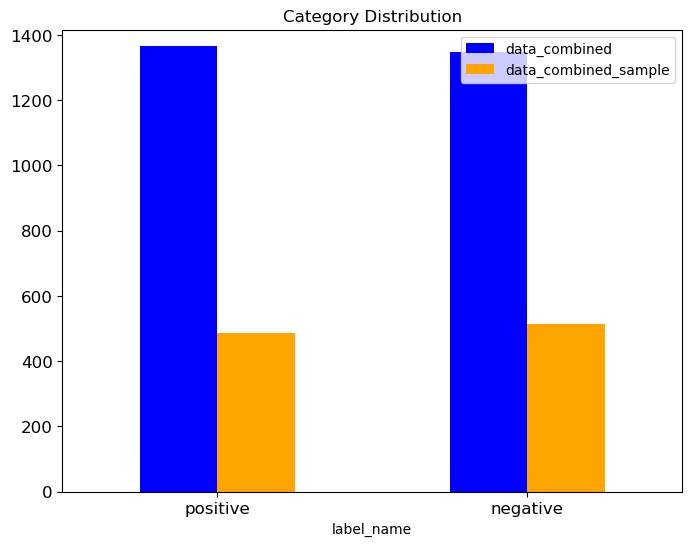

In [147]:
combined = pd.concat([data_combined["label_name"].value_counts(), data_combined_sample["label_name"].value_counts()], axis=1)
combined.columns = ["data_combined", "data_combined_sample"]
print(combined)

# Plot the data with blue and orange bars side by side
combined.plot(kind='bar', rot=0, title="Category Distribution", color=['blue', 'orange'], ylim = [0, max(combined.data_combined + 50)], 
                   fontsize=12, figsize=(8, 6))


### 5.2 Feature Creation

In [148]:
data_combined['unigrams'] = data_combined['sentence'].apply(lambda x: dmh.tokenize_text(x))
data_combined

,sentence,score,label_name,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"
...,...,...,...,...
2709,I think food should have flavor and texture an...,0,negative,"[I, think, food, should, have, flavor, and, te..."
2710,Appetite instantly gone.,0,negative,"[Appetite, instantly, gone, .]"
2711,Overall I was not impressed and would not go b...,0,negative,"[Overall, I, was, not, impressed, and, would, ..."
2712,"The whole experience was underwhelming, and I ...",0,negative,"[The, whole, experience, was, underwhelming, ,..."


### 5.3 Feature subset selection

In [157]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_combined_counts = count_vect.fit_transform(data_combined.sentence) #learn the vocabulary and return document-term matrix
print(data_combined_counts.shape)
print(data_combined_counts) # doc index

(2714, 5153)
  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1
  (1, 1992)	1
  (1, 712)	1
  (1, 1602)	1
  (1, 4859)	1
  (2, 1828)	1
  (2, 4529)	1
  (2, 2022)	1
  :	:
  (2713, 4543)	1
  (2713, 4607)	1
  (2713, 2431)	1
  (2713, 2313)	1
  (2713, 4529)	3
  (2713, 646)	1
  (2713, 2281)	1
  (2713, 4540)	1
  (2713, 3096)	1
  (2713, 4972)	1
  (2713, 2981)	1
  (2713, 4591)	1
  (2713, 297)	1
  (2713, 3165)	1
  (2713, 2629)	1
  (2713, 1539)	1
  (2713, 4546)	1
  (2713, 784)	1
  (2713, 4628)	1
  (2713, 588)	1
  (2713, 2067)	1
  (2713, 3855)	1
  (2713, 3435)	1
  (2713, 5108)	1
  (2713, 1386)	1


In [158]:
count_vect.get_feature_names_out()[100]

'accomodate'

In [159]:
analyze = count_vect.build_analyzer()
analyze(data_combined.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

[ 1 34  3 ...  1  2  1]
[4529  216 2431 2426 4607 4556 3096 4966 2313 1828 4527 3062 5067 2981
 4888 1992 3121 5136  637 2022]


,term_the,term_and,term_it,term_is,term_to,term_this,term_of,term_was,term_in,term_for,term_that,term_not,term_with,term_my,term_very,term_good,term_on,term_you,term_but,term_great
doc_2113,1,2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
doc_2138,1,2,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0
doc_1179,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
doc_123,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2380,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_2256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2365,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
doc_668,0,0,2,2,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
doc_1816,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


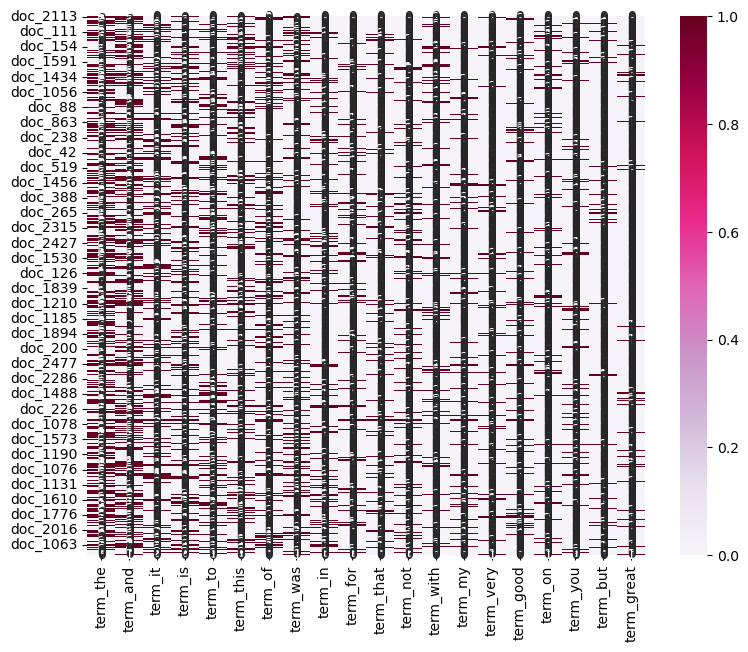

In [160]:
import seaborn as sns

feature_frequencies = np.array(data_combined_counts.toarray().sum(axis=0))
print(feature_frequencies)
top_k_indices = feature_frequencies.argsort()[::-1][:20]
print(top_k_indices)

top_k_features = [count_vect.get_feature_names_out()[i] for i in top_k_indices]

data_combined_sample = data_combined.sample(n=500)
data_combined_counts_sample = data_combined_counts[data_combined_sample.index]

# top_k_freq = np.sort(feature_frequencies)[::-1][:20]
# for i, feature, freq in zip(top_k_indices,top_k_features,top_k_freq):
#     print(i, feature, freq)
plot_x = ["term_"+str(i) for i in top_k_features]
plot_y = ["doc_"+ str(i) for i in list(data_combined_sample.index)]
plot_z = data_combined_counts_sample.toarray()[:,top_k_indices]


# plot_z is data, plot_x is column names, plot_y is row names
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


### 5.4 Dimensionality Reduction


In [161]:
from sklearn.decomposition import PCA

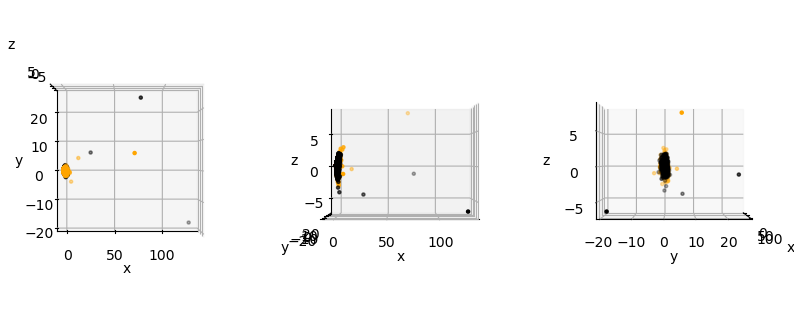

In [170]:
# Answer here
data_combined_reduced = PCA(n_components = 3).fit_transform(data_combined_counts.toarray())
col = ['black', 'orange']

# plot
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

for c, label in zip(col, label_name):
    xs = data_combined_reduced[data_combined['label_name'] == label].T[0]
    ys = data_combined_reduced[data_combined['label_name'] == label].T[1]
    zs = data_combined_reduced[data_combined['label_name'] == label].T[2]
    ax1.scatter(xs, ys, zs, c = c, marker='o', s=5)
    ax2.scatter(xs, ys, zs, c = c, marker='o', s=5)
    ax3.scatter(xs, ys, zs, c = c, marker='o', s=5)

for each in axs:
    each.set_axis_off()

for each in (ax1,ax2,ax3):
    each.set_xlabel('x')
    each.set_ylabel('y')
    each.set_zlabel('z')

ax1.view_init(elev=90, azim=-90) # view along z axis 
ax2.view_init(elev=0, azim=-90) # view along y axis 
ax3.view_init(elev=0, azim=0) # view along x axis 

plt.show()

### 5.5 Attribute Transformation / Aggregation
bar chart visualization:

In [177]:
import plotly.express as px
import plotly.graph_objects as go

In [178]:
# get top 100 frequent terms indices
top_100_indices = feature_frequencies.argsort()[::-1][:100]
# sort them back in the original order (optional)
top_100_indices = top_100_indices[np.argsort(top_100_indices)]
print(top_100_indices)

x = [count_vect.get_feature_names_out()[i] for i in top_100_indices]
y = feature_frequencies[top_100_indices]

# fig = px.bar(x=x, y=y)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


# Create a layout for the chart
fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  # Set tickmode to 'array' to use an array of tickvals
    tickvals=list(range(len(x))),  # Set tickvals to the range of x-values
    ticktext=x,  # Set ticktext to the x-labels
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)
fig.update_layout(hovermode="x")
fig.show(config={"scrollZoom": True, "displayModeBar": True})

[  75  154  179  193  214  216  243  273  297  314  367  373  416  427
  433  466  467  637  646  673 1039 1264 1337 1351 1579 1584 1602 1741
 1821 1828 1882 1953 1981 1992 2022 2066 2104 2112 2121 2157 2238 2281
 2313 2426 2431 2492 2637 2709 2736 2808 2930 2953 2962 2981 3025 3031
 3042 3062 3096 3121 3123 3127 3143 3165 3320 3349 3490 3566 3624 3992
 4159 4174 4199 4524 4527 4529 4535 4543 4546 4556 4591 4607 4627 4819
 4865 4888 4966 4991 5010 5013 5015 5019 5023 5030 5047 5067 5089 5105
 5136 5139]


long tail visualization:

In [172]:
sorted_indices = feature_frequencies.argsort()[::-1][:]

# get top 300
x = [count_vect.get_feature_names_out()[i] for i in sorted_indices[:100]]
y = feature_frequencies[sorted_indices[:100]]

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  
    tickvals=list(range(len(x))),  
    ticktext=x,
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)


fig.show(config={"scrollZoom": True, "displayModeBar": True})

transform values into the log distribution:

In [175]:
import math

In [176]:
feature_frequencies_log = np.array([math.log(i) for i in feature_frequencies])
top_100_indices = feature_frequencies_log.argsort()[::-1][:100]
top_100_indices = top_100_indices[np.argsort(top_100_indices)]

x = [count_vect.get_feature_names_out()[i] for i in top_100_indices]
y = feature_frequencies_log[top_100_indices]

# fig = px.bar(x=x, y=y)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


# Create a layout for the chart
fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  # Set tickmode to 'array' to use an array of tickvals
    tickvals=list(range(len(x))),  # Set tickvals to the range of x-values
    ticktext=x,  # Set ticktext to the x-labels
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)
fig.update_layout(hovermode="x")
fig.show(config={"scrollZoom": True, "displayModeBar": True})

### 5.6 Discretization and Binarization
perform binarization on label_name (or score(which is 0/1 label, already binary)), since we only have 2 labels, one-hot encoding is meaningless?

In [179]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [180]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(data_combined['label_name'])
data_combined['bin_label'] = mlb.transform(data_combined['label_name']).tolist()
data_combined[:9]

,sentence,score,label_name,unigrams,bin_label
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


### 6. Data Exploration
Let's find out the most similiar sentence(except itself) to the first sentence with Cosine Similarity using count(just an example):

In [181]:
document_to_transform_1 = []
sentence_1 = data_combined['sentence'][0]
document_to_transform_1.append(sentence_1)

document_to_transform_2 = []
for each in data_combined['sentence'][1:]:
    
    document_to_transform_2.append(each)


In [182]:
print(document_to_transform_1)
print(document_to_transform_2)

['So there is no way for me to plug it in here in the US unless I go by a converter.']
['Good case, Excellent value.', 'Great for the jawbone.', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 'The mic is great.', 'I have to jiggle the plug to get it to line up right to get decent volume.', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.', 'If you are Razr owner...you must have this!', 'Needless to say, I wasted my money.', 'What a waste of money and time!.', 'And the sound quality is great.', 'He was very impressed when going from the original battery to the extended battery.', 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.', 'Very good quality though', 'The design is very odd, as the ear "clip" is not very comfortable at all.', 'Highly recommend for any one who has a blue tooth phone.', 'I advise EVERYONE DO NOT BE FO

In [183]:
from sklearn.preprocessing import binarize

In [184]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [185]:
from sklearn.metrics.pairwise import cosine_similarity

In [194]:
# Calculate Cosine Similarity
similarity_scores = []
most_similar = 0
max_similarity = 0
for i, each in enumerate(document_vector_count_2):
    cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, each, dense_output=True)
    if cos_sim_count_1_2 > max_similarity:
        max_similarity = cos_sim_count_1_2
        most_similar = i+1
    similarity_scores.append(cos_sim_count_1_2)

print(similarity_scores)

print(f"Most similar to 1st sentence is {most_similar+1} sentence. Sentence: '{data_combined['sentence'][most_similar]}'")
print(f"The Cosine Similarity using count is: {similarity_scores[most_similar-1][0][0]}")

[array([[0.]]), array([[0.21821789]]), array([[0.12598816]]), array([[0.21821789]]), array([[0.27888668]]), array([[0.08399211]]), array([[0.]]), array([[0.08908708]]), array([[0.]]), array([[0.17817416]]), array([[0.15430335]]), array([[0.19047619]]), array([[0.]]), array([[0.19047619]]), array([[0.06900656]]), array([[0.]]), array([[0.17817416]]), array([[0.2057378]]), array([[0.10910895]]), array([[0.12598816]]), array([[0.15430335]]), array([[0.05455447]]), array([[0.18898224]]), array([[0.]]), array([[0.13957263]]), array([[0.20701967]]), array([[0.1820063]]), array([[0.]]), array([[0.23328474]]), array([[0.18156826]]), array([[0.29095719]]), array([[0.11664237]]), array([[0.04454354]]), array([[0.19287919]]), array([[0.08908708]]), array([[0.]]), array([[0.18898224]]), array([[0.]]), array([[0.0952381]]), array([[0.08908708]]), array([[0.]]), array([[0.09759001]]), array([[0.]]), array([[0.17817416]]), array([[0.20701967]]), array([[0.10012523]]), array([[0.]]), array([[0.]]), ar

# >>> **Part3:**

### 1. Generate meaningful new data visualizations

### 2. Generate TF-IDF features from the tokens of each text. 

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [200]:
vectorizer = TfidfVectorizer()

corpus = data_combined.sentence

# this will compute tfidf score for each sentence and term
tfidf_fit = vectorizer.fit_transform(corpus)
tfidf_fit.shape

tfidf_df = pd.DataFrame(tfidf_fit.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.

In [201]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

we split data into 3/4 and 1/4 as training and test data, for  tfidf features and tf features:

In [202]:
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_df, data_combined["score"], test_size=0.25)
X_train_count, X_test_count, Y_train_count, Y_test_count = train_test_split(data_combined_counts, data_combined["score"], test_size=0.25)
print(X_train.shape,X_test.shape)
print(X_train_count.shape,X_test_count.shape)

(2035, 5153) (679, 5153)
(2035, 5153) (679, 5153)


Fit training datas of tfidf and tf to form 2 classifiers:

In [204]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

mnb_count = MultinomialNB()
mnb_count.fit(X_train_count, Y_train_count)

MultinomialNB()

Test out our test datas with two classifier respectively:

In [205]:
Y_pred = mnb.predict(X_test)
Y_pred_count = mnb.predict(X_test_count)

c:\Users\nick0\anaconda3\envs\adb\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but MultinomialNB was fitted with feature names



True Positive:

In [206]:
print(np.count_nonzero(Y_pred == np.array(Y_test)))
print(np.count_nonzero(Y_pred_count == np.array(Y_test_count)))

571
624


calculate accuracy and f1-score for two classifier:

In [208]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)

accuray = accuracy_score(Y_pred, np.array(Y_test))
f1 = f1_score(Y_pred, Y_test)

accuray_count = accuracy_score(Y_pred_count, np.array(Y_test_count))
f1_count = f1_score(Y_pred_count, Y_test_count)

print(f"TF-IDF classifier accuracy: {accuray}, f1-score: {f1}")
print(f"Word frequency classifier accuracy: {accuray_count}, f1-score: {f1_count}")

TF-IDF classifier accuracy: 0.8409425625920471, f1-score: 0.8378378378378378
Word frequency classifier accuracy: 0.9189985272459499, f1-score: 0.9172932330827068


#### Comment : 
in this case, classifier trained with word frequency features without considering inverse document frequency features perform better than TF-IDF, which is normally not the case, this could be due to curse of dimensions, maybe we can perform PCA first to reduce dimensions first.

# >>> **Part4:**